In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from seaborn import lmplot
from seaborn import distplot
from seaborn import boxplot

# empezamos visualizando los datos originales

In [69]:
dataLimpio1 = pd.read_excel('Datos Contravencional 2020.xlsx')
dataLimpio1.head()

,numerocomparendo,tipocomparendo,fechaimposicion,horaimposicion,fechanotificacion,direccioninfraccion,ciudad,infraccion,cepo,metrolinea,...,nombre,valorcomp,saldo,valor_pagado,curso,tipo_curso,grado,numeroprueba,clasevehiculo,claseservicio
0,68001000000024846502,Manual,2020-01-01,01:50:00,2020-01-01,CARRERA 3 OCC CALLE 59,BUCARAMANGA,F,NO,NO,...,BUCARAMANGA,5266800,0,NaN,NaN,NaN,1.0,NaN,Motocicleta,Particular
1,68001000000024846503,Manual,2020-01-01,02:15:00,2020-01-01,CARRERA 3 OCC CALLE 59,BUCARAMANGA,F,NO,NO,...,BUCARAMANGA,2633400,0,NaN,NaN,Interno,0.0,NaN,Motocicleta,Particular
2,68001000000024843956,Manual,2020-01-01,02:50:00,2020-01-01,AVENIDA VIA AL MAR TRASVERSAL CURVA DE LA VIRGEN,BUCARAMANGA,C14,NO,NO,...,BUCARAMANGA,438900,442239,NaN,NaN,Interno,NaN,NaN,Motocicleta,Particular
3,68001000000024843958,Manual,2020-01-01,02:50:00,2020-01-01,AVENIDA AL MAR TRASVERSAL CURVA VIRGEN,BUCARAMANGA,B01,NO,NO,...,BUCARAMANGA,234080,235861,NaN,NaN,NaN,NaN,NaN,Motocicleta,Particular
4,68001000000024846504,Manual,2020-01-01,02:50:00,2020-01-01,CARRERA 3W CALLE 59,BUCARAMANGA,F,NO,NO,...,BUCARAMANGA,5266800,0,NaN,NaN,NaN,1.0,NaN,Motocicleta,Particular


### longitud del dataset para asegurarnos que todos los datos cargaron correctamente

In [3]:
len(dataLimpio1)

8586

In [4]:
dataLimpio1.columns

Index(['numerocomparendo', 'tipocomparendo', 'fechaimposicion',
       'horaimposicion', 'fechanotificacion', 'direccioninfraccion', 'ciudad',
       'infraccion', 'cepo', 'metrolinea', 'chaleco', 'casco', 'pico',
       'restriccion_motocicleta', 'resolucion_111', 'licenciatransito',
       'tipodoc', 'documento', 'inmovilizado', 'grua', 'usuario', 'placaa',
       'entidad', 'nombreagente', 'estado', 'tipo_resolucion',
       'numero_resolucion', 'fecha_documento', 'fecha_pago', 'fecha_acuerdo',
       'placac', 'primernombre', 'segundonombre', 'primerapellido',
       'segundoapellido', 'celular', 'direccioninfractor', 'nombre',
       'valorcomp', 'saldo', 'valor_pagado', 'curso', 'tipo_curso', 'grado',
       'numeroprueba', 'clasevehiculo', 'claseservicio'],
      dtype='object')

### renombrando columnas para facil manipulacion

In [5]:
dataLimpio1.columns=['ncomp','tcomp','fcomp','hcomp','fnotifi','dirinfrac','ciudad','infrac','cepo','metro','chale','casco','pico','restmot','resolu111','licencia','tipodoc','ncedula','inmobi','grua','usuario','placaa','entidad','nomagen','estado','tiresol','nresol','fdocu','fpago','facuerdo','placac','primnom','segnom','primapell','segapell','cel','dirinfractor','name','valorcomp','saldo','valpag','curso','ticurso','grado','nprueba','clasvehicu','classervicio']

In [6]:
dataLimpio1.head()

,ncomp,tcomp,fcomp,hcomp,fnotifi,dirinfrac,ciudad,infrac,cepo,metro,...,name,valorcomp,saldo,valpag,curso,ticurso,grado,nprueba,clasvehicu,classervicio
0,68001000000024846502,Manual,2020-01-01,01:50:00,2020-01-01,CARRERA 3 OCC CALLE 59,BUCARAMANGA,F,NO,NO,...,BUCARAMANGA,5266800,0,NaN,NaN,NaN,1.0,NaN,Motocicleta,Particular
1,68001000000024846503,Manual,2020-01-01,02:15:00,2020-01-01,CARRERA 3 OCC CALLE 59,BUCARAMANGA,F,NO,NO,...,BUCARAMANGA,2633400,0,NaN,NaN,Interno,0.0,NaN,Motocicleta,Particular
2,68001000000024843956,Manual,2020-01-01,02:50:00,2020-01-01,AVENIDA VIA AL MAR TRASVERSAL CURVA DE LA VIRGEN,BUCARAMANGA,C14,NO,NO,...,BUCARAMANGA,438900,442239,NaN,NaN,Interno,NaN,NaN,Motocicleta,Particular
3,68001000000024843958,Manual,2020-01-01,02:50:00,2020-01-01,AVENIDA AL MAR TRASVERSAL CURVA VIRGEN,BUCARAMANGA,B01,NO,NO,...,BUCARAMANGA,234080,235861,NaN,NaN,NaN,NaN,NaN,Motocicleta,Particular
4,68001000000024846504,Manual,2020-01-01,02:50:00,2020-01-01,CARRERA 3W CALLE 59,BUCARAMANGA,F,NO,NO,...,BUCARAMANGA,5266800,0,NaN,NaN,NaN,1.0,NaN,Motocicleta,Particular


### quitando n/a (datos vacios) de los nombres y juntando columnas nombres y apellidos de los infractores 

* por comodidad se trabajara con el primer nombre y los dos apellidos para cada conductor
* sin embargo se deja el codigo comentado de la limpieza de la columna del segundo nombre por si se desea utilizar

In [7]:
primnomsna= dataLimpio1["primnom"].fillna(value="")
#segnomsna = dataLimpio1["segnom"].fillna(value="")
primapellna = dataLimpio1["primapell"].fillna(value="")
segapellna = dataLimpio1["segapell"].fillna(value="")
cedula = dataLimpio1["ncedula"].fillna(value="")

### concatenando nombres y apellidos para encontrar frecuencias de repeticion (es decir numero de partes que tiene cada persona)

* Además verificamos que la longitud del dataset sea la misma que habiamos cargado originalmente, asi nos aseguramos que no perdemos ningun dato

In [8]:
dataLimpio1["nameapell"] = primnomsna.astype(str)+" "+ primapellna.astype(str)+ " " + segapellna.astype(str)
dataLimpio1["nameapell"]

0                  CALAZAN SALAZ 
1              LUIS PEREZ ESCOBAR
2        FERNANDO BOHORQUEZ NUÑEZ
3        FERNANDO BOHORQUEZ NUÑEZ
4         KEVIN GUTIERREZ RAMIREZ
                  ...            
8581                 WILMER PEREA
8582          YESID MACILLA NAVAS
8583    GUILLERMO FERREIRA RIVERA
8584      JHONNY ALEXANDER CRESPO
8585          ANDRES TOSCANO VEGA
Name: nameapell, Length: 8586, dtype: object

### como hay bastantes, para obtener una grafica ahora, debemos limpiar mas el dataset:

* extraemos un nuevo dataset solo con los nombres
* le añadimos la columna con su respectiva frecuencia
* le añadimos la placa que tenia en el momento de la infracción y la frecuencia de la placa

In [9]:
namefilter = pd.DataFrame({"nombres":dataLimpio1["nameapell"],"placac":dataLimpio1["placac"],"cedula":dataLimpio1["ncedula"]})
namefilter['frecuencianom'] = namefilter['nombres'].map(namefilter['nombres'].value_counts()) 
namefilter['frecuenciaplaca'] = namefilter['placac'].map(namefilter['placac'].value_counts())
namefilter.head()

,nombres,placac,cedula,frecuencianom,frecuenciaplaca
0,CALAZAN SALAZ,KPB74E,13889512,1,1.0
1,LUIS PEREZ ESCOBAR,HEO71D,72048921,1,1.0
2,FERNANDO BOHORQUEZ NUÑEZ,SKS94B,1102720175,2,2.0
3,FERNANDO BOHORQUEZ NUÑEZ,SKS94B,1102720175,2,2.0
4,KEVIN GUTIERREZ RAMIREZ,VGU07E,1098777381,1,1.0


In [10]:
print(namefilter.sort_values(by=['nombres']))

                      nombres  placac      cedula  frecuencianom  \
4193                            XVI37         NaN             21   
1451                           DUV170  1014176762             21   
4323                           DVM81B         NaN             21   
1283                           QBT21B         NaN             21   
1281                           QBT21B         NaN             21   
...                       ...     ...         ...            ...   
6395   neiler vargas carrillo  SKE16C  1093752403              2   
6396   neiler vargas carrillo  SKE16C  1093752403              2   
6932  paola trujillo  ramirez  DUS191  1098692702              1   
5579    raul guerrero malagon  SKL277    91180225              1   
1176    sergio ramirez guzman  HDQ169  1098706632              1   

      frecuenciaplaca  
4193              1.0  
1451              1.0  
4323              1.0  
1283              2.0  
1281              2.0  
...               ...  
6395           

### separación de comparendos por nombre y placa:

* aplicamos un filtro para saber cuales placas tienen mas de 3 comparendos y a que nombres esta asociado

(esto con el fin de identificar si algun nombre tiene comparendos registrados con distintas placas, de ser así, podria indicar
que la persona esta conduciendo diversos vehículos en diversos días, luego podría indicar piratería)

In [11]:
filtro = namefilter[(namefilter["frecuenciaplaca"]>2)]

In [12]:
filtrodeci = filtro.sort_values(by=['nombres'])
filtrodeci.head()

,nombres,placac,cedula,frecuencianom,frecuenciaplaca
2134,0 0,XXXXXX,0,3,3.0
2135,0 0,XXXXXX,0,3,3.0
2136,0 0,XXXXXX,0,3,3.0
8379,ALBER CACUA VILLAMIZAR,DUB482,88034122,3,3.0
8378,ALBER CACUA VILLAMIZAR,DUB482,88034122,3,3.0


In [13]:
filtrodeci[(filtrodeci["cedula"]==0)]

,nombres,placac,cedula,frecuencianom,frecuenciaplaca
2134,0 0,XXXXXX,0,3,3.0
2135,0 0,XXXXXX,0,3,3.0
2136,0 0,XXXXXX,0,3,3.0
425,NO LEGIBLE,XWY87,0,4,3.0
422,NO LEGIBLE,XWY87,0,4,3.0
418,NO LEGIBLE,XWY87,0,4,3.0
1021,SIN RECONOCER RECONOCER,TNC34C,0,12,6.0
2474,SIN RECONOCER RECONOCER,EEI16,0,12,3.0
2473,SIN RECONOCER RECONOCER,EEI16,0,12,3.0
2472,SIN RECONOCER RECONOCER,EEI16,0,12,3.0


In [14]:
filtrodeci.tail()

,nombres,placac,cedula,frecuencianom,frecuenciaplaca
6689,YORDIN CANDELA PLATA,XMV72C,1098759097,3,3.0
6690,YORDIN CANDELA PLATA,XMV72C,1098759097,3,3.0
7381,YORMAN ARTURO PEREZ,CAE71F,86333126,3,3.0
7917,YORMAN ARTURO PEREZ,POR06E,17314690,3,3.0
7378,YORMAN ARTURO PEREZ,CAE71F,86333126,3,3.0


### por el momento verificando los datos:

los que tienen mas de 3 partes son 133 personas, pero de esas ninguna tiene asociada mas de una placa, salvo las personas cuyo nombre dice "SIN RECONOCER", en estos aún cabe la posibilidad de que el mismo vehículo fuera manejado por 2 o más personas distintas, no podemos descartar nada aún.por otra parte, empezamos a graficar para darnos cuenta de la dispersion y si los datos mostrados anteriormente son ciertos o si hay algún valor que no hayamos tenido en cuenta

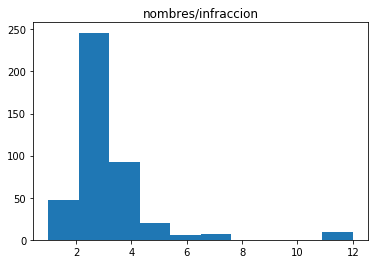

In [15]:
plt.title('nombres/infraccion')
plt.hist(filtrodeci['frecuencianom'])
plt.show()

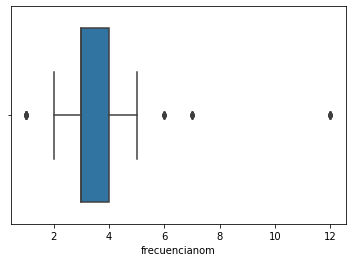

In [16]:
boxplot(filtrodeci.frecuencianom)

### graficando nos damos cuenta que los nombres y placas analizados están correctos con respecto a lo que observamos anteriormente.

* Sin embargo, por el momento se podría considerar que hemos limpiado y organizado los datos para poderlos analizar correctamente pero aún nos hace falta un dato decisivo como puede ser el registro RUNT con el cuál podamos comparar y verificar quién es el dueño de determinada placa, con esto podríamos observar si los distintos comparendos fueron hechos a personas que conducían vehículos de otras personas mas no a los dueños de estos vehículos, además de que podríamos saber si una persona tiene un número "anómalo" de vehículos y si ha habido comparendos aplicados a posibles conductores ilegales 

In [17]:
filtrodeci["frecuenciaplaca"].describe()

count    427.000000
mean       3.487119
std        0.870323
min        3.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: frecuenciaplaca, dtype: float64

# creando una comparacion para saber cuales infractores estan en la hoja del runt

In [18]:
runt = pd.read_excel('runt.xlsx')
len(runt)

376209

In [70]:
runt.columns

Index(['placa', 'comparendo', 'tipocomparendo', 'tipo_documento_infractor',
       'identificacion_infractor', 'tipo_documento_propietario',
       'identificacion_propietario', 'estado_infraccion',
       'direccion_residencia_infractor', 'municipio_residencia_infractor',
       'departamento_residencia_infractor', 'telefono_celular_infractor',
       'direccion_residencia_propietario', 'municipio_residencia_propietario',
       'departamento_residencia_propietario', 'telefono_celular_propietario'],
      dtype='object')

### creando nuevos datasets con las especificaciones que queremos para este analisis

In [33]:
newrunt = pd.DataFrame({"placa":runt['placa'],
                        "cedulainfrac":runt['identificacion_infractor'],
                        "cedulapropie":runt['identificacion_propietario'],
                       })
newinfrac2020 = pd.DataFrame({"nombres":filtrodeci['nombres'],
                              "placa":filtrodeci['placac'],
                              "cedulainfrac2020":filtrodeci['cedula']
                             })

In [34]:
newrunt[(newrunt["placa"]=='XXXXXX')]

,placa,cedulainfrac,cedulapropie
1648,XXXXXX,0,0
1649,XXXXXX,0,0
1651,XXXXXX,0,0


In [35]:
len(newrunt), len(newinfrac2020)

(376209, 427)

### uniendo datasets con las intersecciones para saber cual infractor esta en la hoja de runt

In [36]:
intersect = newinfrac2020.merge(newrunt, how='inner')
len(intersect)

2603

### limpiando placas en XXXXXX ya que no tienen ningun dato

* una vez tenemos limpios de XXXXXX ya tenemos una lista en comun entre los infractores del 2020 y los de la hoja runt

In [37]:
intersect = intersect[(intersect["placa"]!='XXXXXX')]
len(intersect)

2594

In [38]:
intersect['frecuencianom'] = intersect['nombres'].map(intersect['nombres'].value_counts()) 
intersect['frecuenciaplaca'] = intersect['placa'].map(intersect['placa'].value_counts())
intersect.head()

,nombres,placa,cedulainfrac2020,cedulainfrac,cedulapropie,frecuencianom,frecuenciaplaca
9,ALBER CACUA VILLAMIZAR,DUB482,88034122,88034122,41398569,12,12
10,ALBER CACUA VILLAMIZAR,DUB482,88034122,88034122,NaN,12,12
11,ALBER CACUA VILLAMIZAR,DUB482,88034122,88034122,NaN,12,12
12,ALBER CACUA VILLAMIZAR,DUB482,88034122,88034122,NaN,12,12
13,ALBER CACUA VILLAMIZAR,DUB482,88034122,88034122,41398569,12,12


In [64]:
#filtro para saber cuantos datos hay vacios en las cedulas de los propietarios hoja del runt
filtronanproprunt = intersect["cedulapropie"].fillna(value=0)
filtronanproprunt = intersect[(intersect["cedulapropie"]==0)]
filtronanproprunt2 = intersect[(intersect["cedulapropie"]!=0)]

#filtro para saber cuantos datos hay vacios en las cedulas de los infractores hoja del runt
filtronaninfracrunt = intersect["cedulainfrac"].fillna(value=0)
filtronaninfracrunt = intersect[(intersect["cedulainfrac"]==0)]
filtronaninfracrunt2 = intersect[(intersect["cedulainfrac"]!=0)]

#filtro para saber cuantos datos hay vacios en las cedulas de los infractores hoja comparendos
filtronaninfraccomp = intersect["cedulainfrac2020"].fillna(value=0)
filtronaninfraccomp = intersect[(intersect["cedulainfrac2020"]==0)]
filtronaninfraccomp2 = intersect[(intersect["cedulainfrac2020"]!=0)]


print("cedulas propietario vacias hoja runt: "+str(len(filtronanproprunt))+" cedulas infractor vacias hoja runt: "+str(len(filtronaninfracrunt))+" cedulas vacias hoja comparendos: "+str(len(filtronaninfraccomp)))

cedulas propietario vacias hoja runt: 95 cedulas infractor vacias hoja runt: 57 cedulas vacias hoja comparendos: 105


### este es el nuevo dataset donde estan solo los que tienen todos los datos completos

In [65]:
#mostrar solo datos donde todos los campos en cedulas esten completos
filtrocompleto = intersect[(filtronanproprunt2["cedulapropie"]) & (filtronaninfracrunt2["cedulainfrac"]) & (filtronaninfraccomp2["cedulainfrac2020"])]

In [66]:
filtrocompleto.head()

,nombres,placa,cedulainfrac2020,cedulainfrac,cedulapropie,frecuencianom,frecuenciaplaca
9,ALBER CACUA VILLAMIZAR,DUB482,88034122,88034122,41398569,12,12
13,ALBER CACUA VILLAMIZAR,DUB482,88034122,88034122,41398569,12,12
17,ALBER CACUA VILLAMIZAR,DUB482,88034122,88034122,41398569,12,12
21,ALBERTO ARDILA VILLAMIZAR,CAE71F,13845247,13845247,10987505,3,9
22,ALBERTO ARDILA VILLAMIZAR,CAE71F,13845247,86333126,10987505,3,9


In [67]:
len(filtrocompleto)

1111